## Standardization

In [1]:
#import file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
286,15631070,Female,37,62000,0
199,15708228,Male,35,22000,0
18,15704583,Male,46,28000,1
343,15629739,Female,47,51000,1
379,15749381,Female,58,23000,1


In [4]:
df = df.iloc[:, 2:]

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Train test split

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)

In [7]:
x_train.shape

(280, 2)

# Standardization

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#fit the data means find the value of mean , standard divation etc or we say that learning process
scaler.fit(x_train)

#After fit we app to the column by using the transform 
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [10]:
# it return numpy array, so we convert it into dataframe
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [11]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [12]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


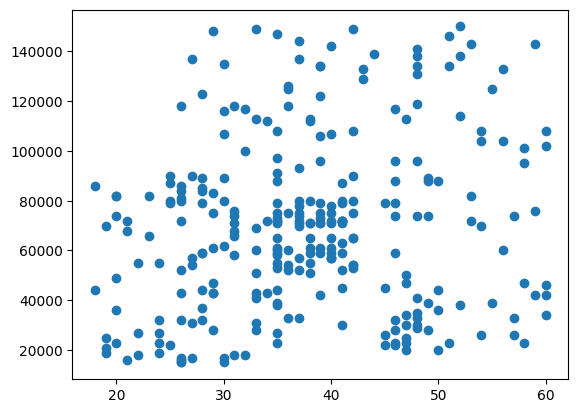

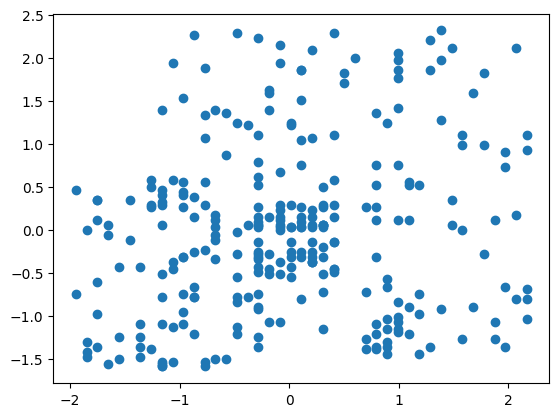

In [13]:
plt.scatter(x_train['Age'], x_train['EstimatedSalary'])
plt.show()
plt.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'])
plt.show()
#data go mean center

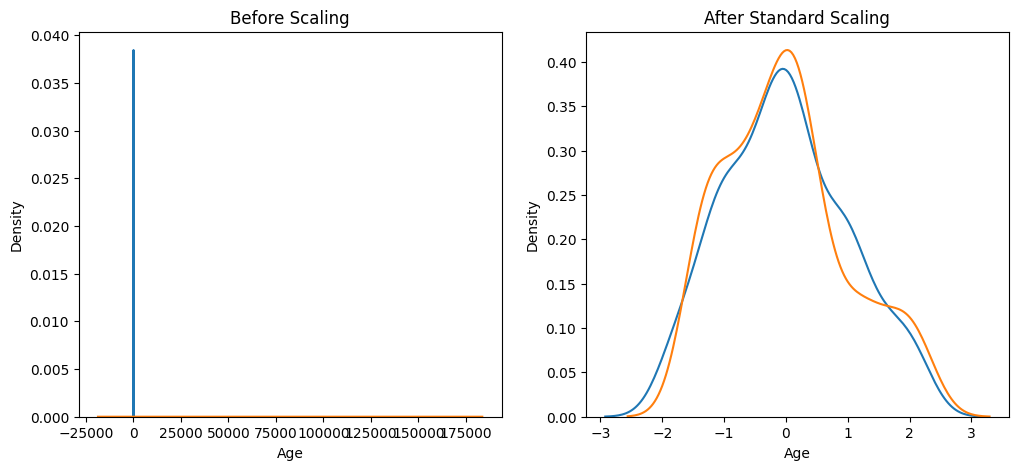

In [14]:


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

#Distribution is not change anything only change the scale, all same 


# Why scale is important

In [15]:
# if we apply the algorithm without scaling the data so accuracy decrease
# scaling increase the accuracy
# it is based on alogrithm like logistic regression , knn etc
# but scaling does not effect the accuracy of algorithm like desicion tree

In [17]:
#outliers
#Outlier effect also similar

# Normalization

In [20]:
df = pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2])
df.columns=['Class label', 'Alchol', 'Malic Acid']

In [21]:
df.head()

,Class label,Alchol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alchol', ylabel='Density'>

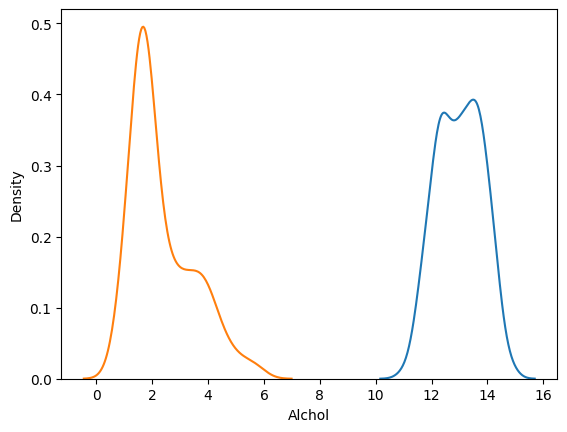

In [24]:
sns.kdeplot(df['Alchol'])
sns.kdeplot(df['Malic Acid'])

In [22]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1), df['Class label'], test_size=0.3, random_state=0)

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

x_trainscale = scaler.transform(x_train)
x_testscale = scaler.transform(x_test)

In [31]:
x_trainscale = pd.DataFrame(x_trainscale, columns=x_train.columns)
x_testscale = pd.DataFrame(x_testscale, columns=x_test.columns)


In [32]:
np.round(x_trainscale.describe())

,Alchol,Malic Acid
count,124.0,124.0
mean,1.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,1.0,0.0
75%,1.0,0.0
max,1.0,1.0


In [ ]:
sns.kdeplot(df['Alchol'])
sns.kdeplot(df['Malic Acid'])